# Comparison


In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option("display.max_columns", None)

In [2]:
from scripts.params import get_params
params = get_params()

from scripts.aux_functions import subset_of_columns

In [3]:
dataroute = params["dataroute"]
resultsroute = params["resultsroute"]
dumproute = params["dumproute"]
graphsroute = params["graphsroute"]

In [4]:
forecasts="forecasts_by_stock_" + params["tablename"] + ".pickle"
filename=os.path.join(resultsroute, forecasts)
with open(filename, "rb") as handle:
    forecasts_by_stock = pickle.load(handle)

In [5]:
residuals="residuals_by_stock_" + params["tablename"] + ".pickle"
filename=os.path.join(resultsroute, forecasts)
with open(filename, "rb") as handle:
    residuals_by_stock = pickle.load(handle)

In [40]:
def plot_forecasts(df, stock, filter=""):
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed
    
    log_rets=df[f"{stock}_log_rets"]
    other_fcast=subset_of_columns(forecasts_by_stock[stock], filter)
    
    sb.lineplot(data=log_rets, markers=True, label="Actual Returns", linewidth=1.5)
    sb.lineplot(data=other_fcast, markers=True)  # Add markers for data points

    # Customize the plot
    plt.title(f'Forecasts Plot {stock}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.grid(True, linestyle='--', linewidth=0.5)  # Add subtle gridlines

    # Enhance legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Series', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    plt.show()

In [26]:
def plot_residuals(df, stock):
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

    sb.lineplot(data=df, markers=True)  # Add markers for data points

    # Customize the plot
    plt.title(f'Residuals Plot {stock}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.grid(True, linestyle='--', linewidth=0.5)  # Add subtle gridlines
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, label="Zero Error")

    # Enhance legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='Series', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()

    plt.show()

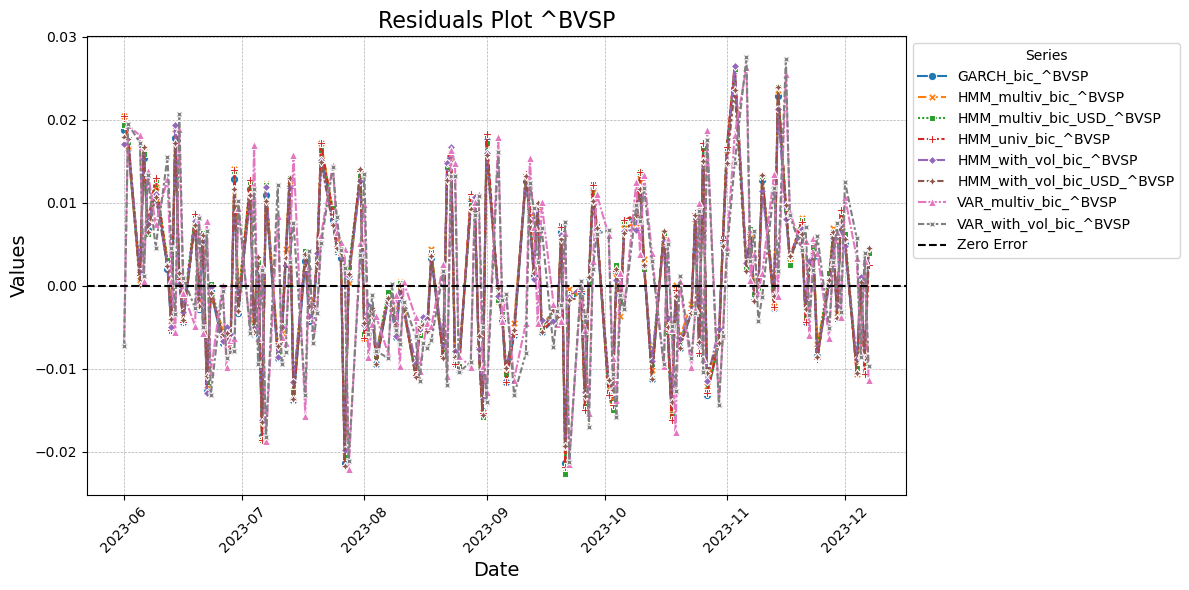

In [45]:
resdf=subset_of_columns(residuals_by_stock[params["tickerlist"][0]], "bic")
plot_residuals(resdf, params["tickerlist"][0])